1. ¿Podemos dar solución a un problema con datos? Elige un tema.
1. Busca y consigue los datos. Vuelta al anterior punto si nos quedamos sin ideas.
1. Define tu problema de Machine Learning: clasificación/regresión, supervisado/ no supervisado, series temporales, imágenes, texto...
1. Exploratorio: obtén todos los estadísticos y gráficos que necesites para entender bien tu dataset.
1. Limpia los datos: duplicados, missings, outliers, columnas inútiles...
1. Feature engineering: transformación y creación de nuevas variables.
1. Prueba varios modelos
1. Analiza los resultados mediante una métrica adecuada a tu problemática.
1. Interpreta los resultados y comprende los outputs del modelo.
1. Siguientes pasos. ¿Se podría seguir enriqueciendo el modelo con otras pruebas o con otros datos?

# 1. Introducción



Prediccion del talento futbolistico
"Es posible predecir el talento futbolistico apartir de los juegos del FIFA?"

hipotesis = "El juego del FIFA es una herramienta util para la deteccion de talento futbolistico"

# 2. Descripción de los Datos
Los datos se componen de un archivo csv maleplayers.csv de 180021 filas x 109 columnas

Vamos a tratar de entender la estructura de los datos asi como sus faltantes y duplicados.

# 2. Carga de librerias

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


# 3. Carga de librerias

In [2]:
# guarda en variables los datasets y su fuente
futbol = pd.read_csv('data/male_players.csv')

C:\Users\aprai\AppData\Local\Temp\ipykernel_17332\367689262.py:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  futbol = pd.read_csv('data/male_players.csv')


# 4.Descripcion de los datos

In [3]:
futbol.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [4]:
futbol.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,180021.000000,180021.000000,180021.0,180021.000000,180021.000000,1.778680e+05,178173.00000,180021.000000,180021.000000,180021.000000,...,147133.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,20024.000000
mean,217326.670294,19.621450,2.0,65.712711,70.779581,2.379142e+06,10638.01081,25.138689,181.287061,75.233356,...,57.837807,45.851456,47.759511,45.764783,16.509979,16.260136,16.129902,16.276951,16.615517,38.750300
std,35215.749284,2.838621,0.0,7.018104,6.255569,6.184358e+06,21637.41400,4.679389,6.764179,6.999181,...,12.305995,20.452502,21.309061,20.899683,17.661659,16.846583,16.499513,17.009393,17.971201,10.578237
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.00000,16.000000,154.000000,49.000000,...,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,200759.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.00000,21.000000,176.000000,70.000000,...,50.000000,26.000000,27.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,30.000000
50%,222734.000000,20.000000,2.0,66.000000,71.000000,7.500000e+05,4000.00000,25.000000,181.000000,75.000000,...,59.000000,51.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,40.000000
75%,239858.000000,22.000000,2.0,70.000000,75.000000,1.800000e+06,10000.00000,28.000000,186.000000,80.000000,...,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,46.000000
max,278145.000000,24.000000,2.0,94.000000,95.000000,1.940000e+08,575000.00000,54.000000,208.000000,110.000000,...,96.000000,94.000000,94.000000,95.000000,91.000000,92.000000,95.000000,92.000000,94.000000,68.000000


In [5]:
futbol.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 109 columns):
 #    Column                          Non-Null Count   Dtype  
---   ------                          --------------   -----  
 0    player_id                       180021 non-null  int64  
 1    player_url                      180021 non-null  object 
 2    fifa_version                    180021 non-null  float64
 3    fifa_update                     180021 non-null  float64
 4    update_as_of                    180021 non-null  object 
 5    short_name                      180021 non-null  object 
 6    long_name                       180021 non-null  object 
 7    player_positions                180021 non-null  object 
 8    overall                         180021 non-null  int64  
 9    potential                       180021 non-null  int64  
 10   value_eur                       177868 non-null  float64
 11   wage_eur                        178173 non-null  float64
 12   

In [6]:
print(futbol.shape)

(180021, 109)


In [7]:
futbol.dtypes

player_id         int64
player_url       object
fifa_version    float64
fifa_update     float64
update_as_of     object
                 ...   
lcb              object
cb               object
rcb              object
rb               object
gk               object
Length: 109, dtype: object

# 5.Limpieza de datos

Seleccionamos las columnas que vamos a utilizar de un total de 109 nos quedamos con 26 que son las columnas que manejaremos.

In [8]:
futbol_1 = futbol[['player_id', 
 # 'player_url',
 #'fifa_version',
 #'fifa_update', 'update_as_of',
 #'short_name',  #'long_name', 
 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
 # 'dob',  
 'height_cm', 'weight_kg', #'club_team_id',
 #'club_name',
 #'league_id',
 #'league_name', 'league_level', 'club_position',
 # 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id',
 #'nationality_name',
 # 'nation_team_id',
 #'nation_position',
 # 'nation_jersey_number', 
 'preferred_foot', #'weak_foot', 'skill_moves',
 #'international_reputation',
 # 'work_rate', 'body_type', 'real_face', 
 'release_clause_eur', 
 # 'player_tags', 'player_traits', 
 'pace', 
 'shooting',
 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
 'mentality_interceptions', 'mentality_positioning',  'mentality_vision', 'mentality_penalties', 'mentality_composure',
 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'
            ]].copy()

In [9]:
futbol_1.nunique()

player_id           53111
player_positions     2031
overall                55
potential              54
value_eur             341
                    ...  
lcb                   475
cb                    475
rcb                   475
rb                    393
gk                    297
Length: 79, dtype: int64

In [10]:
futbol_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   player_id                    180021 non-null  int64  
 1   player_positions             180021 non-null  object 
 2   overall                      180021 non-null  int64  
 3   potential                    180021 non-null  int64  
 4   value_eur                    177868 non-null  float64
 5   wage_eur                     178173 non-null  float64
 6   age                          180021 non-null  int64  
 7   height_cm                    180021 non-null  int64  
 8   weight_kg                    180021 non-null  int64  
 9   preferred_foot               180021 non-null  object 
 10  release_clause_eur           120722 non-null  float64
 11  pace                         159997 non-null  float64
 12  shooting                     159997 non-null  float64
 13 

In [11]:
# Eliminar columnas de tipo object
df_numerico = futbol_1.select_dtypes(exclude=['object'])

print(df_numerico)

        player_id  overall  potential    value_eur  wage_eur  age  height_cm  \
0          231747       91         94  181500000.0  230000.0   24        182   
1          239085       91         94  185000000.0  340000.0   22        195   
2          192985       91         91  103000000.0  350000.0   32        181   
3          158023       90         90   41000000.0   23000.0   36        169   
4          165153       90         90   51000000.0   95000.0   35        185   
...           ...      ...        ...          ...       ...  ...        ...   
180016     220806       41         61      20000.0    2000.0   17        187   
180017     225509       41         50      30000.0    2000.0   17        178   
180018     217591       40         50      15000.0    2000.0   18        190   
180019     222947       40         49      15000.0    2000.0   22        180   
180020     201197       40         40          NaN    2000.0   41        175   

        weight_kg  release_clause_eur  

In [12]:
df_filled = df_numerico.fillna(df_numerico.median(numeric_only=True))
print(df_filled)

        player_id  overall  potential    value_eur  wage_eur  age  height_cm  \
0          231747       91         94  181500000.0  230000.0   24        182   
1          239085       91         94  185000000.0  340000.0   22        195   
2          192985       91         91  103000000.0  350000.0   32        181   
3          158023       90         90   41000000.0   23000.0   36        169   
4          165153       90         90   51000000.0   95000.0   35        185   
...           ...      ...        ...          ...       ...  ...        ...   
180016     220806       41         61      20000.0    2000.0   17        187   
180017     225509       41         50      30000.0    2000.0   17        178   
180018     217591       40         50      15000.0    2000.0   18        190   
180019     222947       40         49      15000.0    2000.0   22        180   
180020     201197       40         40     750000.0    2000.0   41        175   

        weight_kg  release_clause_eur  

In [13]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   player_id                    180021 non-null  int64  
 1   overall                      180021 non-null  int64  
 2   potential                    180021 non-null  int64  
 3   value_eur                    180021 non-null  float64
 4   wage_eur                     180021 non-null  float64
 5   age                          180021 non-null  int64  
 6   height_cm                    180021 non-null  int64  
 7   weight_kg                    180021 non-null  int64  
 8   release_clause_eur           180021 non-null  float64
 9   pace                         180021 non-null  float64
 10  shooting                     180021 non-null  float64
 11  passing                      180021 non-null  float64
 12  dribbling                    180021 non-null  float64
 13 

In [14]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_filled)
df_scaled

array([[0.83318653, 0.94444444, 0.98181818, ..., 0.10989011, 0.05376344,
        0.5       ],
       [0.85956864, 0.94444444, 0.98181818, ..., 0.10989011, 0.06451613,
        0.5       ],
       [0.69382656, 0.94444444, 0.92727273, ..., 0.0989011 , 0.12903226,
        0.5       ],
       ...,
       [0.78229184, 0.        , 0.18181818, ..., 0.0989011 , 0.08602151,
        0.5       ],
       [0.80154812, 0.        , 0.16363636, ..., 0.10989011, 0.08602151,
        0.5       ],
       [0.72335094, 0.        , 0.        , ..., 0.07692308, 0.12903226,
        0.5       ]])

<Axes: >

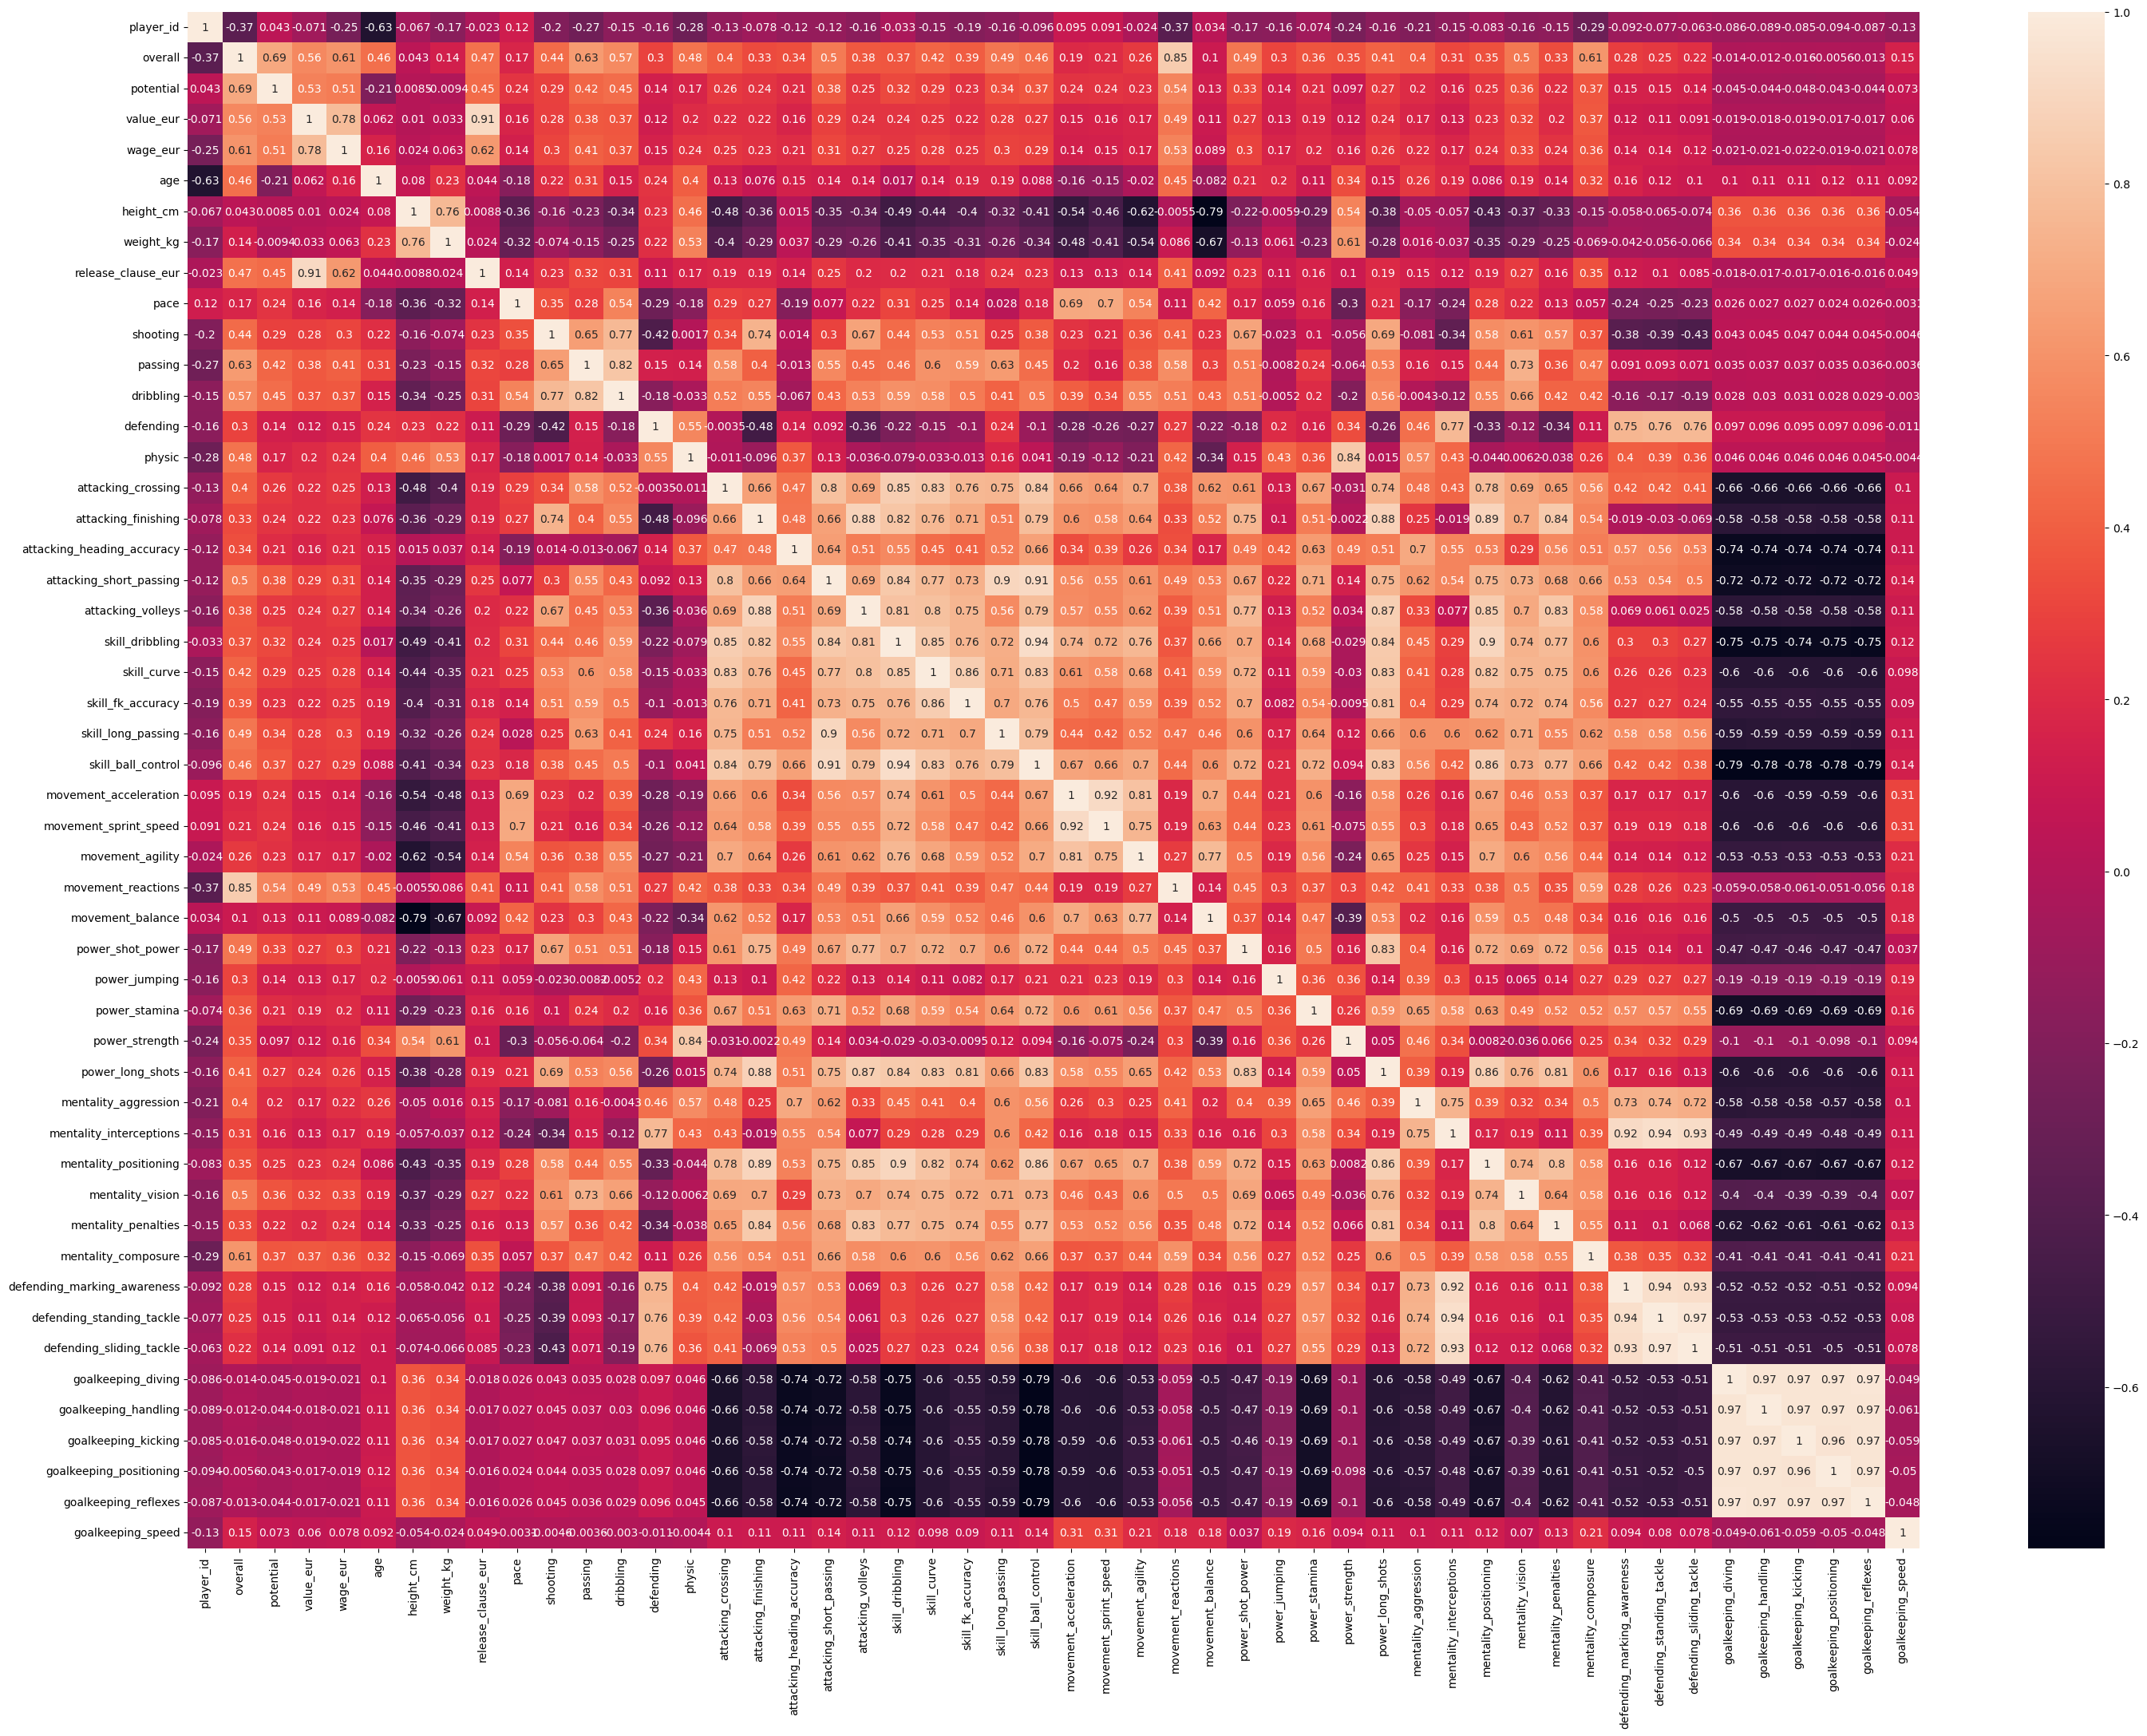

In [15]:
plt.figure(figsize=(35,25))
sns.heatmap(df_filled.corr(numeric_only=True), annot=True)

In [16]:
from sklearn.model_selection import train_test_split
X = df_filled.drop(columns=["overall"])  # Features (excluding target)
y = df_filled["overall"]  # Target (player rating)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

# Define model
xgbc = XGBRegressor(n_estimators=100, random_state=42)

# Define cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Use MAE (Mean Absolute Error) for scoring
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
results_xgbc_cv = cross_val_score(xgbc, X, y, cv=cv, scoring="neg_mean_absolute_error")

# Print results
print("Cross-validation MAE scores:", results_xgbc_cv)
print("Mean MAE:", results_xgbc_cv.mean())
print("MAE standard deviation:", results_xgbc_cv.std())



Cross-validation MAE scores: [-0.48744088 -0.48241964 -0.47946659 -0.48975191 -0.48337072 -0.4900929
 -0.48762593 -0.48009166 -0.48601007 -0.48426044]
Mean MAE: -0.4850530743598938
MAE standard deviation: 0.0035627792326838443


[4.25238796e-02 4.23402451e-02 5.95281780e-01 3.49121019e-02
 7.06312656e-02 3.81524645e-04 3.06512491e-04 5.86829009e-03
 2.24479940e-03 1.91120850e-03 1.79084309e-03 1.29276598e-02
 1.61846932e-02 6.19843509e-03 4.95071104e-03 1.31348590e-03
 3.66813689e-03 2.41219741e-03 4.13885748e-04 1.29287888e-03
 4.43120836e-04 2.68350239e-04 5.03915886e-04 8.65415949e-03
 8.29784316e-04 1.22921006e-03 2.88252544e-04 1.06670834e-01
 3.22466309e-04 1.86131999e-03 3.72393493e-04 1.54095539e-03
 8.81645305e-04 5.53437974e-04 8.76168837e-04 1.16447359e-03
 1.42939261e-03 8.95880163e-04 2.69304699e-04 6.34240219e-04
 7.72213622e-04 3.69154545e-03 3.21140210e-03 3.58723965e-03
 2.87104328e-03 8.24632356e-04 4.51135123e-03 2.84723914e-03
 4.39492142e-04]
               Feature  Importance
2            value_eur    0.595282
27  movement_reactions    0.106671
4                  age    0.070631
0            player_id    0.042524
1            potential    0.042340
3             wage_eur    0.034912
12    

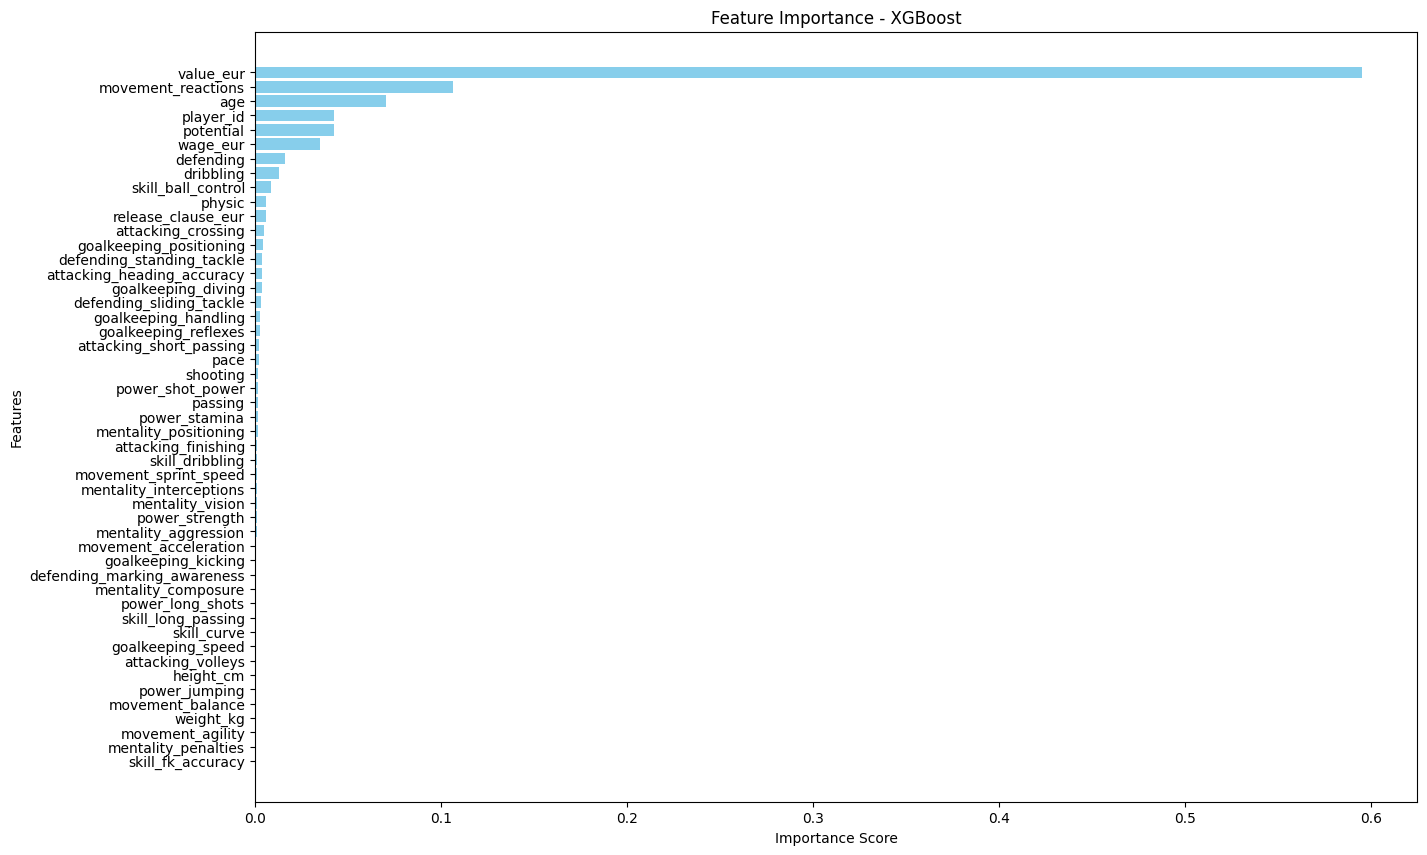

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Define and train the model
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Make sure you have X_train and y_train ready

# Get feature importances
importances = model.feature_importances_
print(importances)

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Print top features
print(feature_df.head(10))  # Show top 10 most important features

# Plot feature importance
plt.figure(figsize=(15, 10))
plt.barh(feature_df["Feature"], feature_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - XGBoost")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()



  <dt><a href="#carga_datos">1. Carga datos</a></dt>
      <dd>Formato de los datos y cantidad de archivos</dd>
    
  <dt><a href="#reg_clas">2. Problema Machine Learning</a></dt>
      <dd>Clasificación o Regresión</dd>
    
  <dt><a href="#split_train_test">3. Divide en train y test</a></dt>
      <dd>Guardamos los datos de test desde el principio</dd>
    
  <dt><a href="#target">4. Target</a></dt>
      <dd>Distribución del target. ¿Desbalanceado?</dd>
    
  <dt><a href="#data_compr">5. Comprensión de variables</a></dt>
      <dd>Cómo son tus features</dd>
    
  <dt><a href="#feat_red_prelim">6. Feat. Red. Preliminar</a></dt>
      <dd>Reducción de features antes de empezar la analítica</dd>

  <dt><a href="#univariant">7. Análisis univariante</a></dt>  
      <dd>Primeras impresiones de las variables. Distribuciones</dd>
    
  <dt><a href="#bivariant">8. Análisis bivariante</a></dt>
      <dd>Búsqueda de relaciones entre las variables</dd>
  
  <dt><a href="#del_features">9. Eliminación de features</a></dt>
      <dd>Features con muchos missings o alto grado de cardinalidad</dd>
    
  <dt><a href="#duplicates">10. Duplicados</a></dt>
      <dd>Comprobamos si el DataFrame tiene duplicados</dd>
    
  <dt><a href="#missings">11. Missings</a></dt>
      <dd>Tratamos los missings</dd>
    
  <dt><a href="#errors">12. Anomalías y errores</a></dt>
      <dd>Detección de datos incoherentes</dd>
    
  <dt><a href="#outliers">13. Outliers</a></dt>
      <dd>Tratamos los outliers</dd>
    
  <dt><a href="#feat_engi">14. Feature Engineering</a></dt>
      <dd>14.1 Transformaciones</dd>
      <dd>14.2 Encodings</dd>
      <dd>14.3 Nuevas Features</dd>
      <dd>14.4 Escalados</dd>
    
  <dt><a href="#feat_reduc">15. Feature Reduction</a></dt>
      <dd>Filtrado de features por importancia</dd>
    
  <dt><a href="#choose_metric">16. Escoger métrica del modelo</a></dt>
      <dd>16.1 Métricas de clasificación</dd>
      <dd>16.2 Métricas de regresión</dd>
    
  <dt><a href="#choose_models">17. Decidir qué modelos</a></dt>
      <dd>Factores que influyen en esta decisión</dd>
    
  <dt><a href="#hyperparmeters">18. Elegir hiperparámetros</a></dt>
      <dd>Según el volumen de datos y sus tipos</dd>
    
  <dt><a href="#pipelines">19. Definimos pipelines y probamos</a></dt>
      <dd>Dependerá de cada modelo. Ejecutamos</dd>
    
  <dt><a href="#results">20. Resultados</a></dt>
      <dd>Comprobamos si el error se ajusta al problema</dd>